# Import

In [1249]:
import numpy as np
import copy
from matplotlib import pyplot as plt

# Funkcja wczytywania danych

In [1250]:
def load_samples_with_text(plik_z_wartosciami):
    data = []
    with open(plik_z_wartosciami) as file:
        for line in file:
            raw_val = line.strip().split()
            val = [float(val) for val in raw_val]
            data.append(val)
    return data

# Wczytanie danych

In [1251]:
data = load_samples_with_text("spirala.txt")

# Generowanie środków

In [1252]:
def generate_centers(data, k):
    centers = []
    for i in range(k):
        random_index = np.random.randint(len(data))
        centers.append(data[random_index])
    return np.asarray(centers)

# Grupowanie punktów

In [1253]:
def cluster_points(data, centers, k):
    clusters = []
    for i in range(len(data)):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(np.subtract(data[i], centers[j])))
        index = np.argmin(distance)
        clusters.append(index)
    return np.asarray(clusters)



# Powtarzanie kroków do minimalnej różnicy

In [1254]:
def difference_is_enough(old, new):
    diff = 0
    for i in range(len(old)):
        diff += np.linalg.norm(old[i] - new[i])
    if diff == 0:
        return True
    else:
        return False

# Aktualizowanie środków

In [1255]:
def update_centers(data, clusters, k):
    center = []
    for i in range(k):
        temp = []
        for j in range(len(data)):
            if clusters[j] == i:
                temp.append(data[j])
        center.append(np.mean(temp, axis=0))
    return np.asarray(center)

# Pętla algorytmu

In [1256]:
centers = generate_centers(data, 4)
clusters = cluster_points(data, centers, 4)


def alg_loop(data, clusters, centers):
    old_centers = centers
    new_centers = update_centers(data, clusters, 4)
    new_clusters = cluster_points(data, new_centers, 4)
    while True:
        if difference_is_enough(old_centers, new_centers):
            return new_centers, new_clusters
        else:
            old_centers = copy.copy(new_centers)
            old_clusters = copy.copy(new_clusters)
            new_centers = update_centers(data, old_clusters, 4)
            new_clusters = cluster_points(data, old_centers, 4)


centers2, clusters2 = alg_loop(data, clusters, centers)

# Umieszczenie pogrupowanych punktów na wykresie

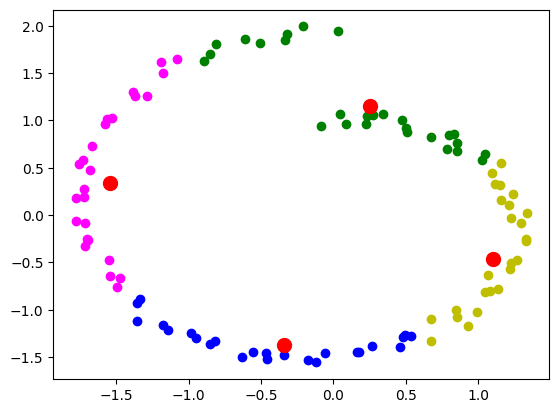

In [1257]:
fig = plt.figure()
colors = {0: 'magenta', 1: 'g', 2: 'b', 3: 'y'}
for i in range(len(clusters2)):
    plt.scatter(data[i][0], data[i][1], color=colors[clusters2[i]])
for i in range(len(centers2)):
    plt.scatter(centers2[i][0],centers2[i][1],s=100,marker='o', color='r')